In [1]:
import BioSimSpace as BSS

### Create Free System

In [4]:
mif180 = BSS.IO.readMolecules(["mif180.parm7","mif180.rst7"])

In [5]:
free = BSS.Solvent.tip3p(molecule=mif180, box=3*[40*BSS.Units.Length.angstrom], ion_conc = 0.15)

In [7]:
view = BSS.Notebook.View(free)
view.system()

NGLWidget(gui_style='ngl')

In [10]:
type(free)

BioSimSpace._SireWrappers._system.System

## Minimisation

In [11]:
minimisation_protocol = BSS.Protocol.Minimisation(steps = 50000)

In [12]:
minimisation_process = BSS.Process.Amber(free, minimisation_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [13]:
minimisation_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Minimisation(steps=50000), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmphs3re24n', seed=None)

In [16]:
free_minimised = minimisation_process.getSystem(block=True)

In [17]:
BSS.IO.saveMolecules("free_minimised", free_minimised, ["prm7", "rst7","pdb"])

['/home/finlayclark/Documents/research/restraint_comparison_mif/study/system_preparation/equilibration/free/free_minimised.prm7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/study/system_preparation/equilibration/free/free_minimised.rst7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/study/system_preparation/equilibration/free/free_minimised.pdb']

## Equilibration

#### PMEMD NVT equilibration for 5 ps while restraining all non-solvent atoms

In [39]:
equil1_protocol = BSS.Protocol.Equilibration(
                                runtime=5*BSS.Units.Time.picosecond, 
                                temperature_start=0*BSS.Units.Temperature.kelvin, 
                                temperature_end=298*BSS.Units.Temperature.kelvin,
                                restraint="all"
                                )

In [40]:
equil1_process = BSS.Process.Amber(free_minimised, equil1_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [41]:
equil1_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Equilibration(timestep=2.0000 fs, runtime=5.0000 ps, temperature_start=0.0100 K, temperature_end=298.0000 K, pressure=None, report_interval=100, restart_interval=500, restraint='all'), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmpq5pcgkkm', seed=None)

In [43]:
equil1_process.isRunning()

False

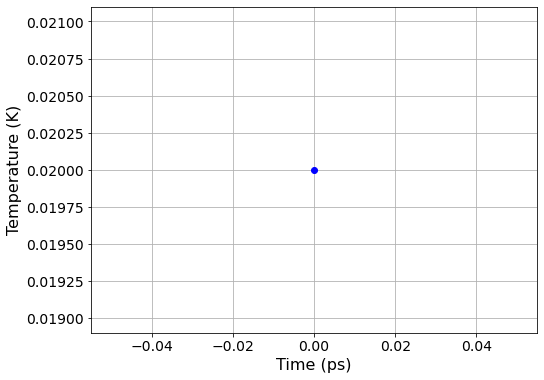

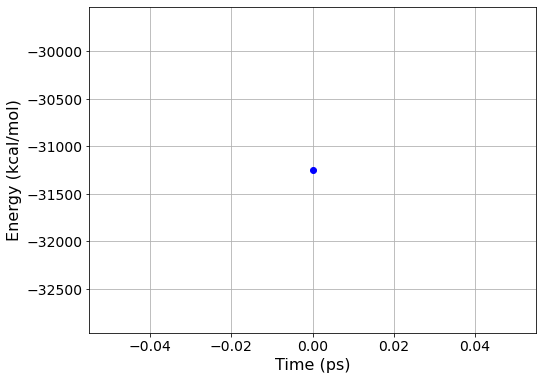

In [44]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil1_process.getTime(time_series=True), equil1_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil1_process.getTime(time_series=True), equil1_process.getTotalEnergy(time_series=True))

In [45]:
system_equil1 = equil1_process.getSystem(block=True)

#### PMEMD NVT equilibration for 50 ps without restraints

In [46]:
equil2_protocol = BSS.Protocol.Equilibration(
                                runtime=50*BSS.Units.Time.picosecond, 
                                temperature_end=298*BSS.Units.Temperature.kelvin,
                                )

In [47]:
equil2_process = BSS.Process.Amber(system_equil1, equil2_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [48]:
equil2_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Equilibration(timestep=2.0000 fs, runtime=50.0000 ps, temperature_start=300.0000 K, temperature_end=298.0000 K, pressure=None, report_interval=100, restart_interval=500, restraint=None), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmpczof88lq', seed=None)

In [49]:
equil2_process.isRunning()

True

In [50]:
equil2_process.getTotalEnergy()

-1.7221e+04 kcal/mol

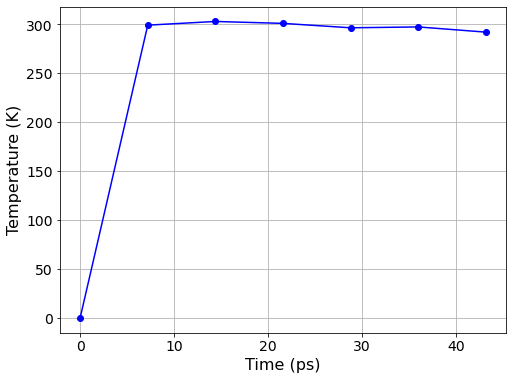

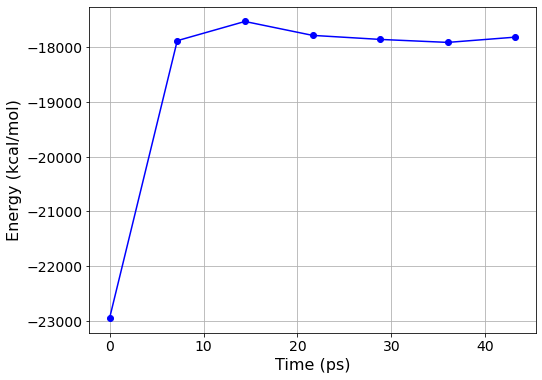

In [36]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil2_process.getTime(time_series=True), equil2_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil2_process.getTime(time_series=True), equil2_process.getTotalEnergy(time_series=True))

In [38]:
system_equil2 = equil2_process.getSystem(block=True)

### PMEMD NPT equilibration for 200 ps while restraining non-solvent heavy atoms

In [ ]:
equil3_protocol = BSS.Protocol.Equilibration(
                                runtime=200*BSS.Units.Time.picosecond, 
                                pressure=1*BSS.Units.Pressure.atm,
                                temperature=298*BSS.Units.Temperature.kelvin,
                                restraint="heavy",
                                )

In [ ]:
equil3_process = BSS.Process.Amber(system_equil2, equil3_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd')

In [ ]:
equil3_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Equilibration(timestep=2.0000 fs, runtime=50.0000 ps, temperature_start=300.0000 K, temperature_end=300.0000 K, pressure=None, report_interval=100, restart_interval=500, restraint=None), exe='/home/finlayclark/software/amber20/bin/pmemd', name='amber', work_dir='/tmp/tmpthywj2fi', seed=None)

In [ ]:
equil3_process.isRunning()

True

In [ ]:
equil3_process.getTotalEnergy()

-2.2779e+04 kcal/mol

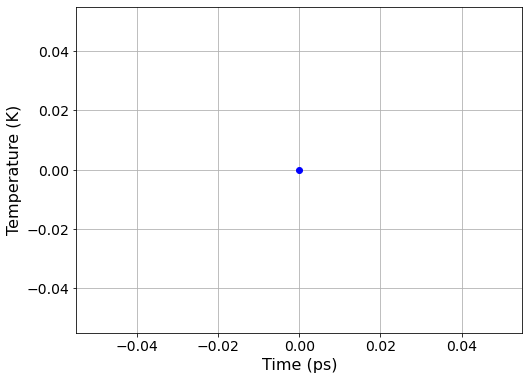

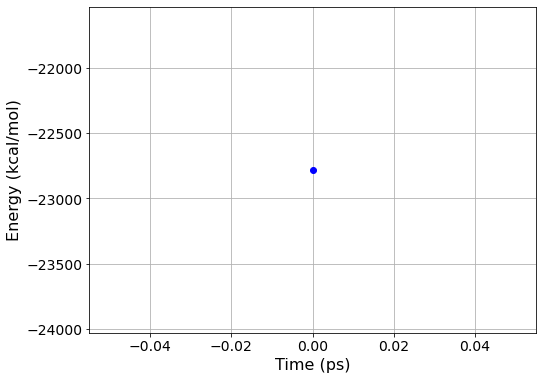

In [ ]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil3_process.getTime(time_series=True), equil3_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil3_process.getTime(time_series=True), equil3_process.getTotalEnergy(time_series=True))

In [ ]:
system_equil3 = equil3_process.getSystem(block=True)

#### PMEMD NPT equilibration for 2 ns without restraints

In [10]:
equil4_protocol = BSS.Protocol.Equilibration(
                                runtime=2000*BSS.Units.Time.picosecond, 
                                pressure=1*BSS.Units.Pressure.atm,
                                temperature=298*BSS.Units.Temperature.kelvin)

In [11]:
equil4_process = BSS.Process.Amber(system_equil3, equil4_protocol, exe = '/home/finlayclark/software/amber20/bin/pmemd.cuda')

In [12]:
equil5_process.getInput()

'amber_input.zip'

In [112]:
equil4_process.start()

BioSimSpace.Process.Amber(<BioSimSpace.System: nMolecules=2154>, BioSimSpace.Protocol.Equilibration(timestep=2.0000 fs, runtime=400.0000 ps, temperature_start=300.0000 K, temperature_end=300.0000 K, pressure=1.0000 atm, report_interval=100, restart_interval=500, restraint=None), exe='/home/finlayclark/software/amber20/bin/pmemd.cuda', name='amber', work_dir='/tmp/tmprefggk2x', seed=None)

In [124]:
equil4_process.isRunning()

False

In [114]:
equil4_process.getTotalEnergy()

-2.1699e+04 kcal/mol

In [125]:
equil4_process.getTotalEnergy()

-1.7706e+04 kcal/mol

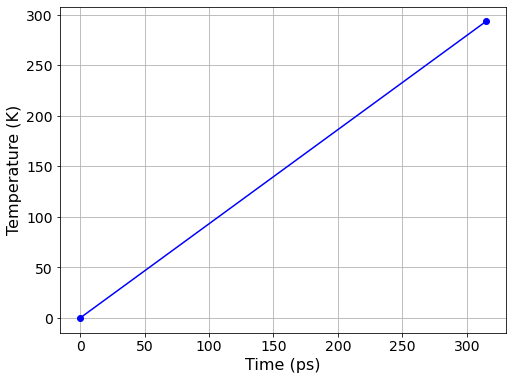

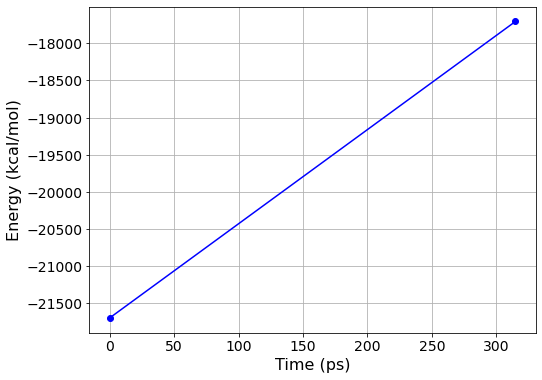

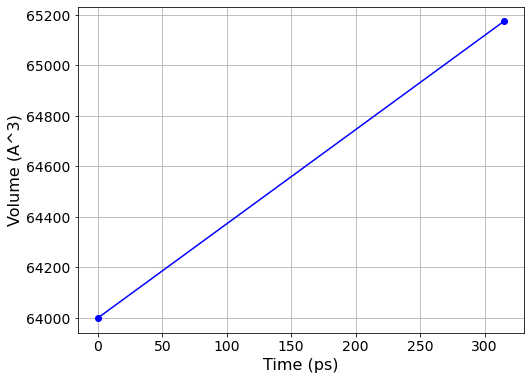

In [126]:
# Generate a plot of time vs temperature.
plot1 = BSS.Notebook.plot(equil4_process.getTime(time_series=True), equil4_process.getTemperature(time_series=True))

# Generate a plot of time vs energy.
plot2 = BSS.Notebook.plot(equil4_process.getTime(time_series=True), equil4_process.getTotalEnergy(time_series=True))

# Generate a plot of time vs volume.
plot2 = BSS.Notebook.plot(equil4_process.getTime(time_series=True), equil4_process.getVolume(time_series=True))

In [127]:
free_equilibrated = equil4_process.getSystem(block=True)

In [128]:
BSS.IO.saveMolecules("free_equilibrated", , ["prm7", "rst7", "pdb"])

['/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/mif_180_equilibrated.prm7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/mif_180_equilibrated.rst7',
 '/home/finlayclark/Documents/research/restraint_comparison_mif/testing/somd_tut/mif_180_equilibrated.pdb']

In [103]:
view = BSS.Notebook.View(free_equilibrated)
view.molecule(3)

NGLWidget(gui_style='ngl')